In [ ]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns



x_train_audio = pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeatures.csv')


xtrainaudiofull=pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestrain.csv')
y_train_audio = xtrainaudiofull['label']


y_train = y_train_audio  

print(x_train_audio.shape, y_train_audio.shape)

(108, 82) (108,)


In [ ]:
x_test_audio = pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestestlabel.csv')


xtestaudiofull=pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestestlabelsorder.csv')
y_test_audio = xtestaudiofull['label']


y_test = y_test_audio  

print(x_test_audio.shape, y_test_audio.shape)

(48, 82) (48,)


In [ ]:
ytam=pd.read_csv('/content/drive/MyDrive/train108.csv')
y_train_mmse=ytam['mmse']

In [ ]:
ytestam=pd.read_csv('/content/drive/MyDrive/test108crct.csv')
y_test_mmse=ytestam['mmse']

In [ ]:
y_test_mmse

0     28
1     29
2     24
3     30
4     21
5     15
6     29
7     28
8     27
9     26
10    28
11    23
12    30
13    17
14    29
15    30
16    27
17    30
18    30
19    10
20    29
21    17
22    12
23    30
24    29
25    19
26    29
27    18
28    20
29    20
30    13
31    22
32    12
33    24
34    11
35    26
36    30
37    28
38    19
39    30
40    25
41    30
42    30
43    18
44    28
45    23
46    28
47    27
Name: mmse, dtype: int64

In [ ]:
y_train_mmse

0       NA
1       30
2       29
3       30
4       30
      ... 
103     20
104     24
105     12
106     20
107     13
Name: mmse, Length: 108, dtype: object

In [ ]:
xtrainaudiofull=pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestrain.csv')
y_train_audio = xtrainaudiofull['label']

y_train = y_train_audio  

In [ ]:
y_train_audio

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    1
105    1
106    1
107    1
Name: label, Length: 108, dtype: int64

In [ ]:
y_test_text

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0])

In [ ]:
y_test_audio

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
Name: label, dtype: int64

In [ ]:
y_test

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    1
22    1
23    0
24    0
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    1
35    0
36    0
37    0
38    1
39    0
40    1
41    0
42    0
43    1
44    0
45    1
46    0
47    0
Name: label, dtype: int64

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    1
105    1
106    1
107    1
Name: label, Length: 108, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ad_dict = {'NON-AD': 0,
                'AD': 1}

ad_keys = list(['NON-AD', 'AD'])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(ad_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F1-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=ad_keys)

## Get word2vec Features

In [ ]:
from numpy import load
# load array
x_train_text = load('/content/drive/MyDrive/word2vec_train.npy')
y_train_text = load('/content/drive/MyDrive/labelstext_train.npy')
print(x_train_text.shape, y_train_text.shape)

(108, 300) (108,)


In [ ]:
y_train_text

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from numpy import load

x_test_text = load('/content/drive/MyDrive/word2vec_test.npy')
y_test_text = load('/content/drive/MyDrive/labeltext_test.npy')
print(x_test_text.shape, y_test_text.shape)


(48, 300) (48,)


In [ ]:
y_test=y_test_text

In [ ]:
import numpy
numpy.array_equal(y_test_text,y_test_audio, equal_nan=False)

True

In [ ]:
import numpy
numpy.array_equal(y_train_text,y_train_audio, equal_nan=False)

True

## Combine Text + Audio Features

In [ ]:
combinedxtrain = np.concatenate((np.array(x_train_audio[x_train_audio.columns[2:]]), x_train_text), axis=1)
combinedxtest = np.concatenate((np.array(x_test_audio[x_test_audio.columns[2:]]), x_test_text), axis=1)

print(combinedxtrain.shape)

combined_features_dict = {}

combined_features_dict['x_train'] = combinedxtrain
combined_features_dict['x_test'] = combinedxtest
combined_features_dict['y_train'] = np.array(y_train)
combined_features_dict['y_test'] = np.array(y_test)

with open('combined_features.pkl', 'wb') as f:
    pickle.dump(combined_features_dict, f)

(108, 380)


In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    1
105    1
106    1
107    1
Name: label, Length: 108, dtype: int64

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(combined_xtrain, y_train)

NameError: ignored

In [ ]:
combinedxtest.shape

(48, 380)

Test Set Accuracy =  0.708
Test Set F1-score =  0.708
Test Set Precision =  0.708
Test Set Recall =  0.708
Confusion matrix
[[17  7]
 [ 7 17]]


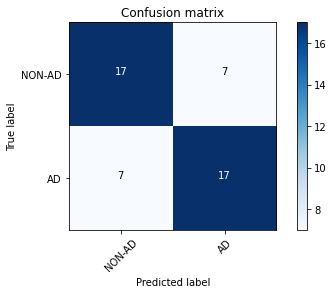

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(combinedxtrain, y_train)

pred_probs = rf_classifier.predict_proba(combinedxtest)
display_results(y_test, pred_probs)

Test Set Accuracy =  0.583
Test Set F1-score =  0.583
Test Set Precision =  0.584
Test Set Recall =  0.583
Confusion matrix
[[13 11]
 [ 9 15]]


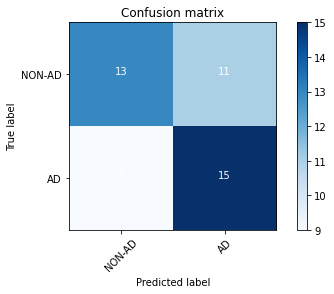

In [ ]:
xgb_classifier = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob', 
                                   n_estimators=600, sub_sample=0.8, num_class=len(ad_dict),
                                   booster='gbtree', n_jobs=4)
xgb_classifier.fit(combinedxtrain, y_train)
pred_probs = xgb_classifier.predict_proba(combinedxtest)
display_results(y_test, pred_probs)

Test Set Accuracy =  0.500
Test Set F-score =  0.333
Test Set Precision =  0.250
Test Set Recall =  0.500
Confusion matrix
[[24  0]
 [24  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0]), array([[0.88942933, 0.11057072],
        [0.19929628, 0.80070376],
        [0.46554768, 0.5344523 ],
        [0.6086063 , 0.39139375],
        [0.27007735, 0.7299227 ],
        [0.03849664, 0.9615033 ],
        [0.93938357, 0.06061641],
        [0.10990344, 0.89009655],
        [0.79925406, 0.20074594],
        [0.7969172 , 0.20308281],
        [0.07773292, 0.92226714],
        [0.799309  , 0.20069101],
        [0.9054271 , 0.09457289],
        [0.9224026 , 0.07759736],
        [0.5822639 , 0.41773614],
        [0.19347914, 0.8065208 ],
        [0.5840688 , 0.41593128],
        [0.320898  , 0.67910206],
        [0.11114063, 0.88885933],
        [0.29262346, 0.70737654],
        [0.383933  , 0.61606693],
        [0.5526377 , 0.4473623 ],
        [0.08770359, 0.91229635],
        [0.7397127 , 0.26028726],
        [0.8833

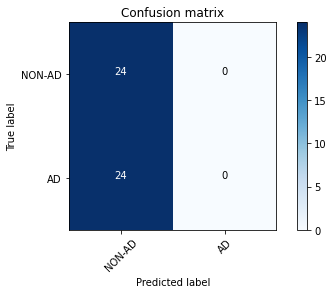

In [ ]:
svc_classifier = LinearSVC()

svc_classifier.fit(combinedxtrain, y_train)

pred = svc_classifier.predict(combinedxtest)


one_hot_true = one_hot_encoder(y_test, len(pred), len(ad_dict))
print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=ad_keys)
(y_test, pred_probs)

Test Set Accuracy =  0.521
Test Set F1-score =  0.469
Test Set Precision =  0.534
Test Set Recall =  0.521
Confusion matrix
[[ 5 19]
 [ 4 20]]


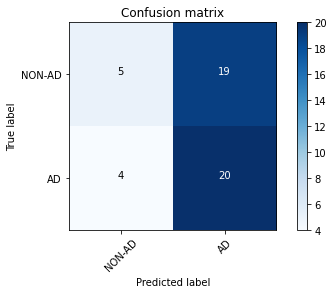

In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(500, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier.fit(combinedxtrain, y_train)

pred_probs = mlp_classifier.predict_proba(combinedxtest)

display_results(y_test, pred_probs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Set Accuracy =  0.562
Test Set F1-score =  0.553
Test Set Precision =  0.568
Test Set Recall =  0.562
Confusion matrix
[[17  7]
 [14 10]]


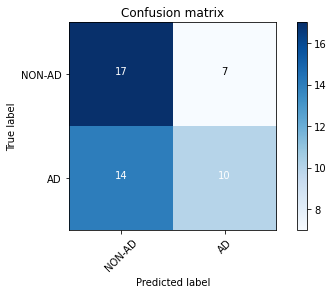

In [ ]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

lr_classifier.fit(combinedxtrain, y_train)

pred_probs = lr_classifier.predict_proba(combinedxtest)

display_results(y_test, pred_probs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Set Accuracy =  0.562
Test Set F1-score =  0.553
Test Set Precision =  0.568
Test Set Recall =  0.562
Confusion matrix
[[17  7]
 [14 10]]


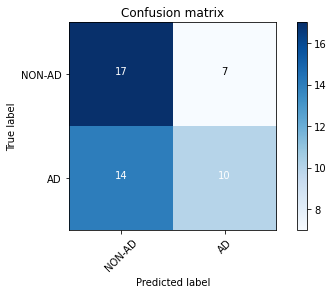

In [ ]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

lr_classifier.fit(combinedxtrain, y_train)

pred_probs = lr_classifier.predict_proba(combinedxtest)

display_results(y_test, pred_probs)


Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()
  
regr.fit(combinedxtrain, y_train_mmse)
print(regr.score(combinedxtest, y_test_mmse))

-1.8405569356292975


In [ ]:
y_train_mmse[0]=30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred=regr.predict(combinedxtest)
from sklearn.metrics import mean_squared_error
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  10.848261799657818


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(combinedxtrain, y_train_mmse)
y_pred=rf.predict(combinedxtest)
from sklearn.metrics import mean_squared_error
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  5.755015564622545


In [ ]:
from sklearn.svm import SVR
svr = SVR().fit(combinedxtrain, y_train_mmse)
y_pred=svr.predict(combinedxtest)
from sklearn.metrics import mean_squared_error
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))


RMSE :  6.576595557571688
